In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulate the standard Brownian motion from Theory 1. Plot 4 simulation graphs for time $t \leq 4$. Using Monte Carlo approach, compute A, B, C, and write functions with input t to compute E, F. 

## Theory 1: Consider the standard Brownian motion $W=(W(t), t \geq 0)$. Find: 

In [2]:
def brownian_motion_sim( dt, T, mu=0, sigma=1, x0=None):
    N = int(T/dt)
    BM = np.append(np.zeros(1),np.cumsum(np.random.normal(mu*dt, sigma*np.sqrt(dt), N)))
    if x0 is not None:
        BM= np.cumsum(np.append(x0, np.random.normal(mu*dt, sigma*np.sqrt(dt), N)))
    time = np.linspace(0,T, N+1)    
    
    return BM, np.round(time,2)

def find_value_at_T(values,jumptimes, T):
    idx = np.where(jumptimes == T)[-1][-1]
    return values[idx]

In [3]:
dt = 0.01
N = 10000
T=5
sims=[]
np.random.seed(1234)
for i in range(N):
    a,b = brownian_motion_sim(dt, T)
    sims.append(a)
    time = b

Text(0.5, 1.0, 'Brownian Motion - Theory 1')

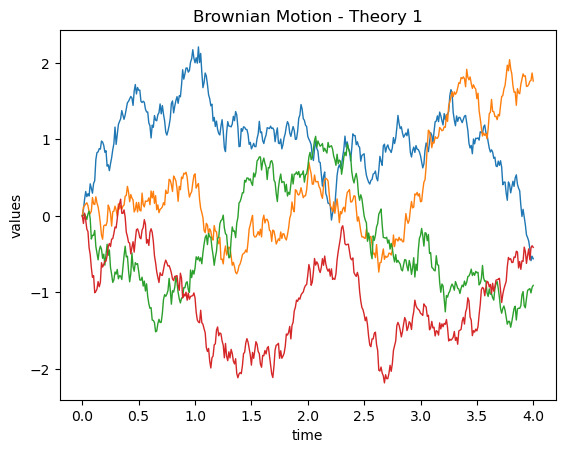

In [4]:
np.random.seed(10000)
for i in np.random.choice(N, 4):
    plt.plot(time[0:401], sims[i][0:401], lw=1)

plt.xlabel('time')
plt.ylabel('values')
plt.title('Brownian Motion - Theory 1')

### side validation to make sure pdf of simulations at time t matches the pdf of normal distribution expected from theory


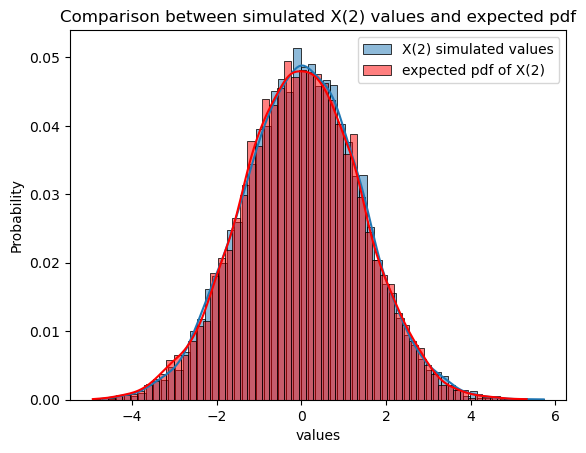

In [5]:
#verify X(2) pdf matches expected pdf 

x_2 = []
for i in range(N):
    x_2.append(find_value_at_T(sims[i], time, 2))

expected_x_2 = np.random.normal(loc=0, scale=np.sqrt(2), size=N)

sns.histplot(x_2, kde=True, stat='probability', label='X(2) simulated values')
sns.histplot(expected_x_2, stat='probability', kde=True, color='red', label='expected pdf of X(2)')
plt.xlabel('values')
plt.title('Comparison between simulated X(2) values and expected pdf')
plt.legend()



## A. $\mathbb{P}(1<W(4)<3)$ 


In [6]:
count=0
for i in range(N):
    w_4 = find_value_at_T(sims[i], time, 4)
    if (w_4 >1) and (w_4<3):
        count+=1
        
print('P(1<W(4)<3)=', count/N)        

P(1<W(4)<3)= 0.243


## B. $\mathbb{P}(W(3) > W(1) + 1) $ 


In [7]:
count=0
for i in range(N):
    w_1 = find_value_at_T(sims[i], time, 1)
    w_3 = find_value_at_T(sims[i], time, 3)
    if w_3 > (w_1+ 1):
        count+=1
        
print('P(W(3) > W(1) + 1)=', count/N)        

P(W(3) > W(1) + 1)= 0.2345


## C. $\mathbb{P} (W(1) < W(2) < W(4)) $ 


In [8]:
count=0
for i in range(N):
    w_1 = find_value_at_T(sims[i], time, 1)
    w_2 = find_value_at_T(sims[i], time, 2)
    w_4 = find_value_at_T(sims[i], time, 4)
    if (w_1 < w_2) & (w_2 < w_4):
        count+=1
        
print('P(W(1) < W(2) < W(4))=', count/N)        

P(W(1) < W(2) < W(4))= 0.2518


## D. $\mathbb{P} (-5 < W(5) < 0 | W(1.4) = -2) $

In [9]:


count1=0
count2= 0
for i in range(N):
    w = find_value_at_T(sims[i], time, 1.4)
    w_5 = find_value_at_T(sims[i], time, 5)
    if np.round(w,2) == -2.0:
        count1+=1
        if w_5 > -5 and w_5 < 0:
            count2+=1
print('P(-5 < W(5) < 0 | W(1.4) = -2)=', count2/count1)            

P(-5 < W(5) < 0 | W(1.4) = -2)= 0.8888888888888888


## E. $\mathbb{E}[W^3(t) ] \text{ for }t > 0$ 




In [10]:
def get_BM_skew(t):
    return 0

## F. $\mathbb{E} [W^4(t)]  \text{ for }t > 0$ 

In [11]:
def get_BM_kurtosis(t):
    return 3*t**2

# 2. Simulate the Brownian motion from Theory 2. Plot 4 simulation graphs for time $t \leq 5$. Empirically compute A, D, E, F, G.

## Theory 2: Take a Brownian motion $X=(X(t), t \geq 0)$ with drift $\mu=1.5$ and diffusion $\sigma^2=0.25$. Assume it starts from $X(0)=-2.4$. Find:

In [12]:
dt = 0.01
T = 5
N = 10000
sims=[]
np.random.seed(12345)
for i in range(N):
    a,b = brownian_motion_sim(dt, T, mu=1.5, sigma=0.5, x0=-2.4)
    sims.append(a)
    time = np.round(b,2)

Text(0.5, 1.0, 'Brownian Motion - Theory 2')

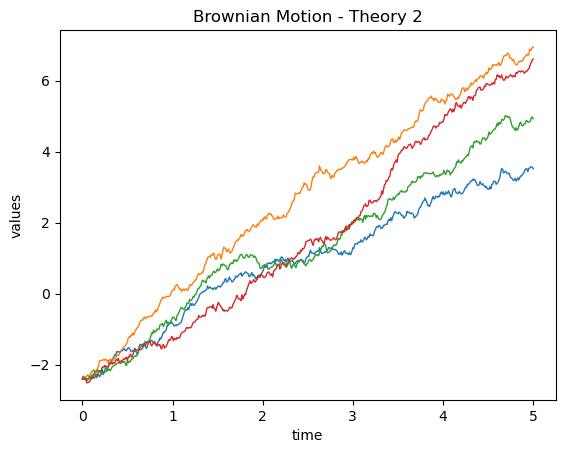

In [13]:
np.random.seed(10000)
for i in np.random.choice(N,4):
    plt.plot(time, sims[i], lw=1)

plt.xlabel('time')
plt.ylabel('values')
plt.title('Brownian Motion - Theory 2')

## A. $\mathbb{P}(X(3)>0 ) $

In [14]:
count=0
for i in range(N):
    x_3 = find_value_at_T(sims[i], time, 3)
    if x_3>0:
        count+=1
        
print('P(X(3)>0) = ', count/N)        

P(X(3)>0) =  0.9923


## B. $\mathbb{P}(X(5)>-2| X(3)=-1) $

In [15]:
count1=0
count2= 0
for i in range(N):
    x_3 = find_value_at_T(sims[i], time, 3)
    x_5 = find_value_at_T(sims[i], time, 5)
    if np.round(x_3,2) == -1:
        count1+=1
        if x_5 > -2:
            count2+=1
            
print('X(5)>-2 | X(3)=-1)=', count2/count1)            

X(5)>-2 | X(3)=-1)= 1.0


## C. The density of $X(5) $ 

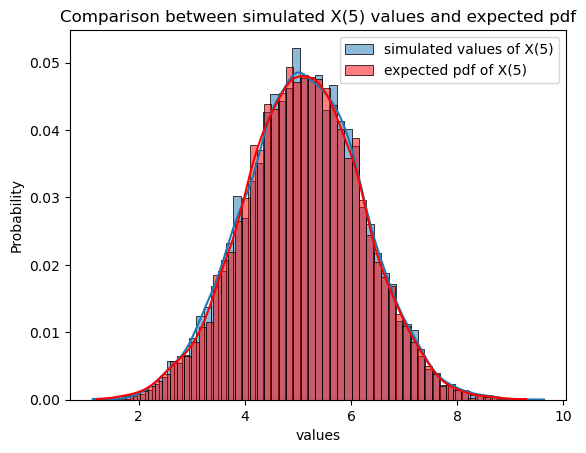

In [16]:
x_5 = []
for i in range(N):
    x_5.append(find_value_at_T(sims[i], time, 5))

x_5_expected = np.random.normal(loc=7.5, scale=np.sqrt(1.25), size=N) + -2.4

sns.histplot(x_5, kde=True, stat='probability', label='simulated values of X(5)')
sns.histplot(x_5_expected, stat='probability', kde=True, color='red', label='expected pdf of X(5)')
plt.xlabel('values')
plt.title('Comparison between simulated X(5) values and expected pdf')
plt.legend()

## D. $\mathbb{E} [X^2(5)] $

In [17]:
print('E[X^2(5)]=', np.mean((np.array(x_5))**2))

E[X^2(5)]= 27.257475061609387


## E. $\mathbb{E}[X^3(5) ]$

In [18]:
print('E[X^3(5)]=',np.mean((np.array(x_5))**3))

E[X^3(5)]= 151.80741540957388


## F. $\mathbb{P} (1+ X(1) < X(3)) $

In [19]:
count=0
for i in range(N):
    x_1= find_value_at_T(sims[i], time, 1)
    x_3 = find_value_at_T(sims[i], time, 3)
    if (x_1+1)< x_3:
        count+=1
        
        
print('P(1+ X(1) < X(3))=', count/N)        

P(1+ X(1) < X(3))= 0.9977


## G. $\mathbb{P}(X(1)<X(2)<X(4))$ 

In [20]:
count=0
for i in range(N):
    x_1= find_value_at_T(sims[i], time, 1)
    x_2 = find_value_at_T(sims[i], time, 2)
    x_4 = find_value_at_T(sims[i], time, 4)
    if (x_1<x_2) and (x_2<x_4):
        count+=1
        
print('P(X(1) < X(2) < X(4))=', count/N)        

P(X(1) < X(2) < X(4))= 0.9989


# 3. Simulate the Levy process from Theory 3. Plot 4 simulation graphs for time $t \leq 5$

## Theory 3: Take a Levy process $L = (L(t), t \geq 0) $ which is a sum of independent Brownian motion from Theory 2 and a compound Poisson process with intensity $\lambda =0.4$ and jumps with Laplace distribution with mean 0.3 and standard deviation 1.2. Find the mean, variance, and the MGF of $L(t)$.

In [21]:
def simulate_compound_poisson_process(CPP_mu, CPP_sigma, intensity, N):
    jumpTimes= np.append(np.zeros(1),np.cumsum(np.random.exponential(scale=1/intensity, size=N)))
    compound_values=  np.append(np.zeros(1), np.random.laplace(loc=CPP_mu, scale=CPP_sigma/np.sqrt(2),  size=N))
    return compound_values, np.round(jumpTimes,2)

def Levy_sim(dt, T, BM_mu, BM_sigma, CPP_mu,CPP_sigma,intensity, x0):
    N = int(T/dt)
    BM_increments = np.append(x0,np.random.normal(BM_mu*dt, BM_sigma*np.sqrt(dt), N))
    CPP_increments, CPP_jumptimes = simulate_compound_poisson_process(CPP_mu,CPP_sigma,intensity,N)
    
    time = np.round(np.linspace(0,T, N+1),2)  
    for i,count in enumerate(CPP_jumptimes):
        if count> np.max(time):
            break
        try:
            idx = np.where(time==count)[-1][-1]
            BM_increments[idx] += CPP_increments[i]
        except (IndexError):
            print('No matching time jump for', count)
    L= np.cumsum(BM_increments)
    return L, time



In [22]:
dt = 0.01
N = 10000
T=5
sims=[]
np.random.seed(12345)
for i in range(N):
    a,b = Levy_sim(dt, T, BM_mu=1.5, BM_sigma=0.5, CPP_mu=0.3, CPP_sigma=1.2, intensity=0.4, x0=-2.4)
    sims.append(a)
    time = b

Text(0.5, 1.0, 'Levy Process - Theory 3')

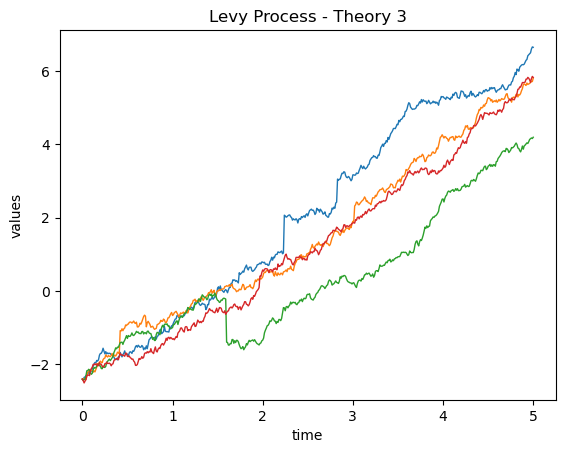

In [23]:
np.random.seed(10000)
for i in np.random.choice(N, 4):
    plt.plot(time, sims[i], lw=1)

plt.xlabel('time')
plt.ylabel('values')
plt.title('Levy Process - Theory 3')

In [24]:
x= []
for i in range(N):
    x.append(find_value_at_T(sims[i],time,5))
    
print('E[X(5)]=', np.mean(x))
print('Var[X(5)]=', np.var(x))    

E[X(5)]= 5.698926645489278
Var[X(5)]= 4.26190550193573
